1. Import Dependencies

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pyarrow
import csv

2. Data Acquisition 

In [7]:
df = pd.read_csv("healthexp.csv")
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


3. Data Inspection

In [9]:
# Display first 10 rows
print(df.head(10))

# Display shape of dataset
print(df.shape)

# Display data types of dataset
print(df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


4. Initial Descriptive Statistics 

In [10]:
#Display Descriptive Statistics of Dataset 
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


5. Data Distribution for Numerical Columns 

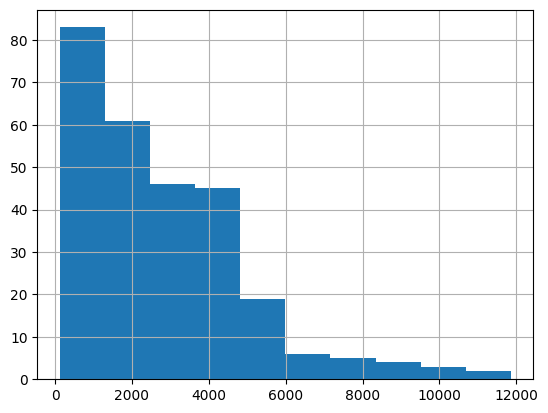

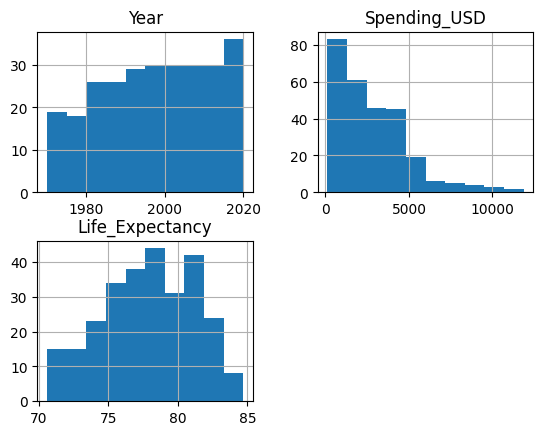

In [13]:
# Inspect histogram by numerical column
df['Spending_USD'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

There seems to be a an odd relationship with spending and life expectancy. In some countries, life expectancy is lower even when the spending is higher, and vice versa with other countries. There may be more factors than health expenditure spending that go into life expectancy. 

6. Data Distribution for Categorical Columns 

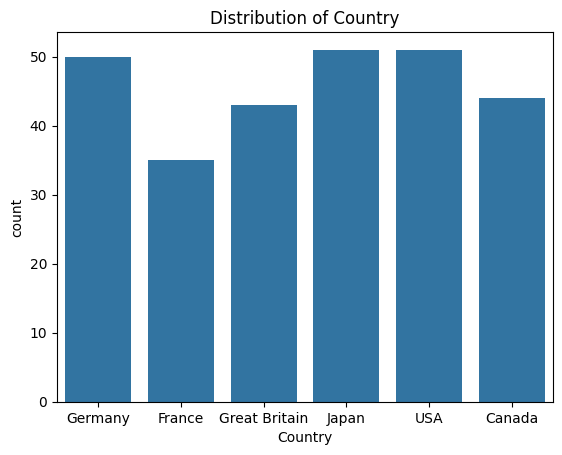

In [16]:
# Inspect value counts by categorical column
df['Country'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

Observation

Japan and USA have the same amount of records, with other countries such as France, Germany, Great Britain and Canada not having records some of the years in the dataset. 

7. Data Transformation and Feature Engineering

In [27]:
# Renaming columns
df.rename(columns={'Spending_USD': '$ spent in millions'}, inplace=True)
df.rename(columns={'Life_Expectancy': 'Life_Exp'}, inplace=True)

# Adding columns 
df['Money Spent / Life EXP Ratio'] = df['$ spent in millions'] / df['Life_Exp']

#confirm these changes
df.head()

,Year,Country,$ spent in millions,Life_Exp,Money Spent / Life EXP Ratio
0,1970,Germany,252.311,70.6,3.573810
1,1970,France,192.143,72.2,2.661260
2,1970,Great Britain,123.993,71.9,1.724520
3,1970,Japan,150.437,72.0,2.089403
4,1970,USA,326.961,70.9,4.611580


8. Initial Visualizations

Subsection 1. Money Spent by each Country  

Goal: Compare the amount of money spent overtime by each country

Chart Type: Bar 

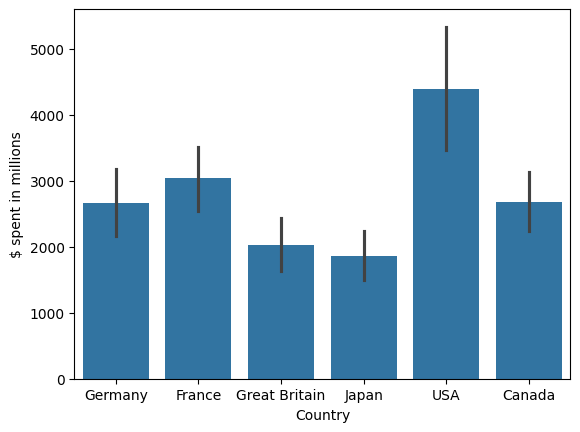

In [31]:
# Display bar chart for Goal 1
sns.barplot(data=df, x="Country", y="$ spent in millions")
plt.show()

As we can see here, the USA has spent the most money on health expenditures throughout the years, with France being next closest. All countries were above 1500 (in millions) spent

Subsection 2: Life Expectancy of Each country 

Goal: Compare the Life expectancies of each country 

Chart: Rel Plot

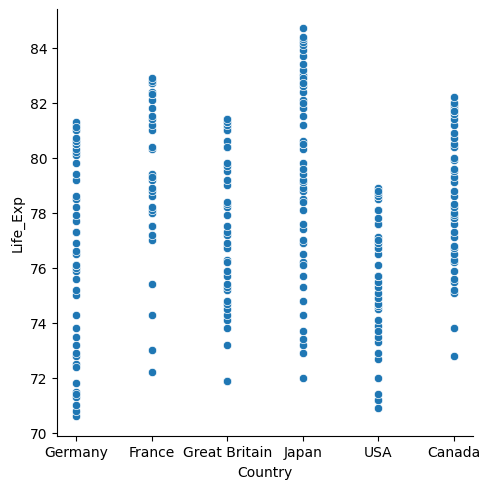

In [32]:
# Display Rel Plot for Goal 2
sns.relplot(data=df, x="Country", y="Life_Exp",)
plt.show()

Based off of this chart, we can see that Japan tends to have the highest life expectancy compared to other countries, despite spending the least amount of money. In complete opposition, USA has the lowest life expectancy, yet they spend the most on health expenditures.

Subsection 3: Years and Money Spent / Life Exp Ratio

Goal: Compare the ratio between countries over the years

Chart: Scatter plot 

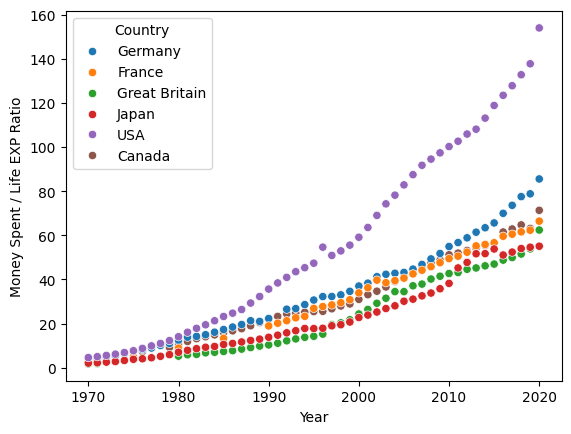

In [33]:
# Display scatter plot for Goal 3
sns.scatterplot(data=df, x="Year", y="Money Spent / Life EXP Ratio", hue="Country")
plt.show()

Based off of this scatter plot, we are able to see that the USA has a much higher ratio than every other country. All ratios were similar in the 1970's to late 1980's. However, as time went on, USA's ratio became much higher while most other countries stayed similar with one another. 

9. Conclusion

This EDA explains the Health expenditures by each country from 1970 to 2020. This data was explored with different charts and columns along with story telling. We explored to see if there was any correlation between the variables to draw better conclusions about the data itself. 